# Importing librarys

In [2]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

## Download the Data

In [ ]:
baba_medium_data = yf.download("BABA", period="2y", interval="1h")

[*********************100%***********************]  1 of 1 completed


In [ ]:
baba_medium_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BABA,BABA,BABA,BABA,BABA
Datetime,,,,,
2023-01-30 14:30:00+00:00,111.391701,113.139900,109.779999,111.690002,11459198
2023-01-30 15:30:00+00:00,112.669998,112.750000,111.180000,111.389999,2259790
2023-01-30 16:30:00+00:00,112.209999,113.150002,112.120003,112.675003,1997179
2023-01-30 17:30:00+00:00,112.190002,112.379997,111.800003,112.197197,1161796
2023-01-30 18:30:00+00:00,111.830002,112.198997,111.724998,112.180000,829704


In [ ]:
# rename the columns "Close", "High", "Low", "Open", "Volume"
baba_medium_data.columns = ["Close", "High", "Low", "Open", "Volume"]

In [ ]:
baba_medium_data.tail()

,Close,High,Low,Open,Volume
Datetime,,,,,
2025-01-28 16:30:00+00:00,90.589996,90.669998,90.220001,90.550003,1196882
2025-01-28 17:30:00+00:00,90.910004,90.949997,90.550003,90.589996,981440
2025-01-28 18:30:00+00:00,90.964996,91.220001,90.889999,90.900002,1013610
2025-01-28 19:30:00+00:00,94.943001,94.989998,90.965698,90.970001,11527996
2025-01-28 20:30:00+00:00,96.059998,96.430000,94.900002,94.949997,9017591


In [ ]:
baba_medium_data.shape

(3487, 5)

In [ ]:
baba_medium_data.describe()

,Close,High,Low,Open,Volume
count,3487.000000,3487.000000,3487.000000,3487.000000,3.487000e+03
mean,84.672075,84.989011,84.352216,84.667216,2.416075e+06
std,9.818794,9.917604,9.731083,9.831922,2.538755e+06
min,67.330002,67.599998,66.629997,67.199997,3.934620e+05
25%,76.562500,76.844997,76.264999,76.517502,1.105886e+06
50%,83.885002,84.154999,83.529999,83.860001,1.650280e+06
75%,89.589996,89.972500,89.134750,89.592499,2.733552e+06
max,117.529999,117.820000,116.839996,117.449997,4.634470e+07


In [ ]:
baba_medium_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3487 entries, 2023-01-30 14:30:00+00:00 to 2025-01-28 20:30:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3487 non-null   float64
 1   High    3487 non-null   float64
 2   Low     3487 non-null   float64
 3   Open    3487 non-null   float64
 4   Volume  3487 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 163.5 KB


In [ ]:
# check for the missing values
baba_medium_data.isnull().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
# download the data
baba_medium_data.to_csv("baba_medium_data.csv")

# Loading the data

In [3]:
baba_medium_data = pd.read_csv("baba_medium_data.csv")

# Exploratory Analysis

In [4]:
baba_medium_data.head()

,Datetime,Close,High,Low,Open,Volume
0,2023-01-30 14:30:00+00:00,111.391701,113.139900,109.779999,111.690002,11459198
1,2023-01-30 15:30:00+00:00,112.669998,112.750000,111.180000,111.389999,2259790
2,2023-01-30 16:30:00+00:00,112.209999,113.150002,112.120003,112.675003,1997179
3,2023-01-30 17:30:00+00:00,112.190002,112.379997,111.800003,112.197197,1161796
4,2023-01-30 18:30:00+00:00,111.830002,112.198997,111.724998,112.180000,829704


In [5]:
baba_medium_data.shape

(3487, 6)

# Univariate Analysis

In [6]:
baba_medium_data.describe()

,Close,High,Low,Open,Volume
count,3487.000000,3487.000000,3487.000000,3487.000000,3.487000e+03
mean,84.672075,84.989011,84.352216,84.667216,2.416075e+06
std,9.818794,9.917604,9.731083,9.831922,2.538755e+06
min,67.330002,67.599998,66.629997,67.199997,3.934620e+05
25%,76.562500,76.844997,76.264999,76.517502,1.105886e+06
50%,83.885002,84.154999,83.529999,83.860001,1.650280e+06
75%,89.589996,89.972500,89.134750,89.592499,2.733552e+06
max,117.529999,117.820000,116.839996,117.449997,4.634470e+07


In [7]:
baba_medium_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  3487 non-null   object 
 1   Close     3487 non-null   float64
 2   High      3487 non-null   float64
 3   Low       3487 non-null   float64
 4   Open      3487 non-null   float64
 5   Volume    3487 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 163.6+ KB


In [8]:
# change Datetime data type
baba_medium_data['Datetime'] = pd.to_datetime(baba_medium_data['Datetime'])

In [9]:
# skewness and kurtosis
print("Skewness:", baba_medium_data.select_dtypes(include=np.number).skew())
print("Kurtosis:", baba_medium_data.select_dtypes(include=np.number).kurtosis())

Skewness: Close     0.742875
High      0.749120
Low       0.732448
Open      0.739857
Volume    5.313763
dtype: float64
Kurtosis: Close      0.208559
High       0.218458
Low        0.182675
Open       0.197383
Volume    51.047852
dtype: float64


## Distribution Analysis

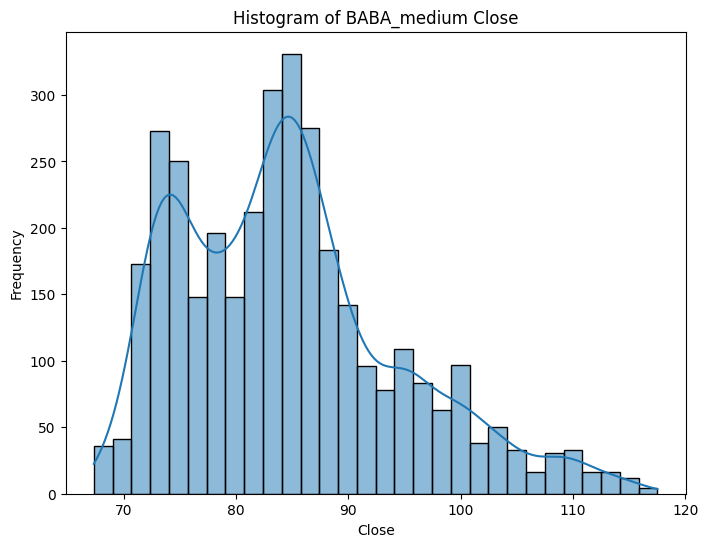

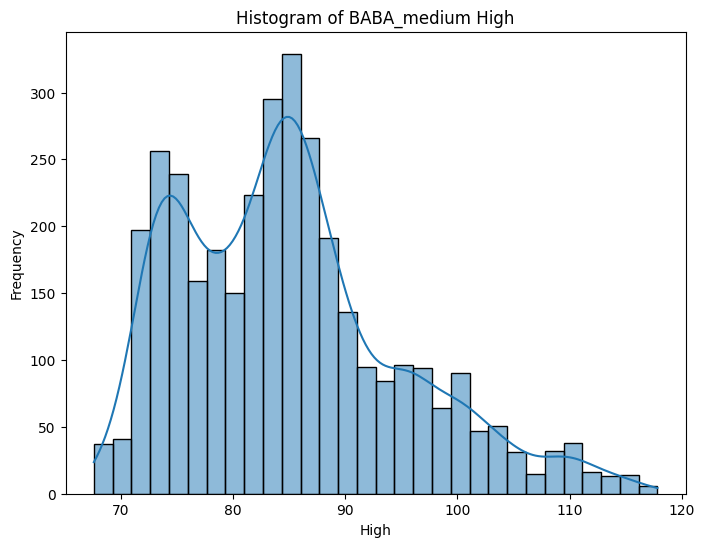

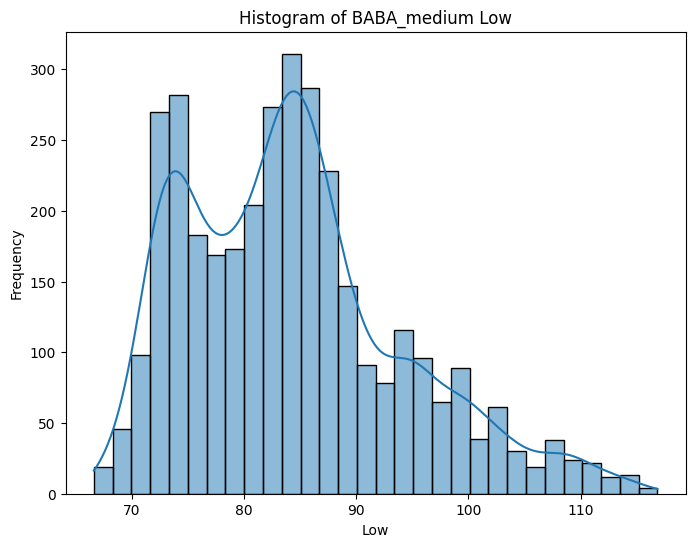

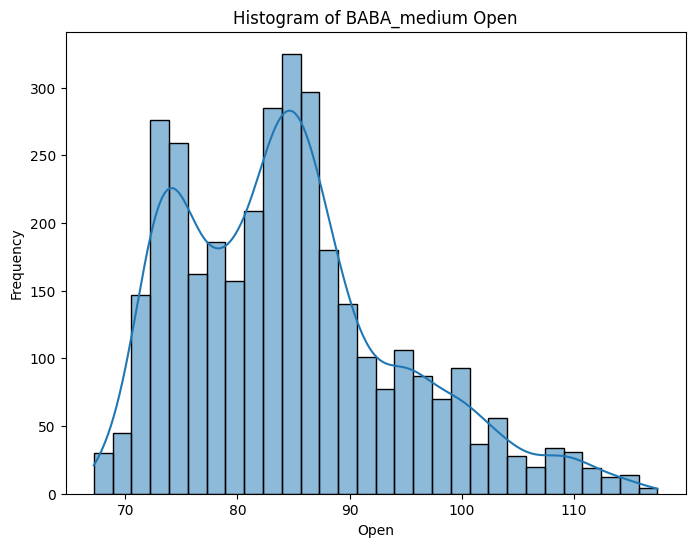

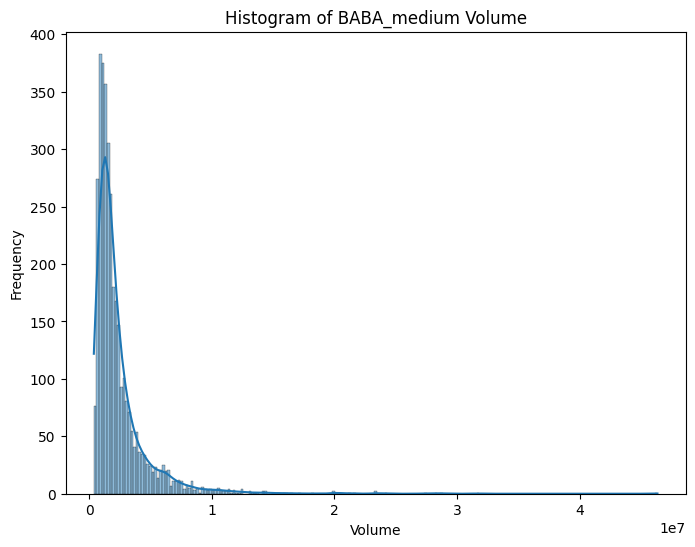

In [10]:
# Identify numerical columns
numerical_columns = baba_medium_data.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(baba_medium_data[column].unique()) > 10:
        plt.figure(figsize=(8, 6))
        sns.histplot(baba_medium_data[column], kde=True)
        plt.title(f'Histogram of BABA_medium {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

## Trend Analysis

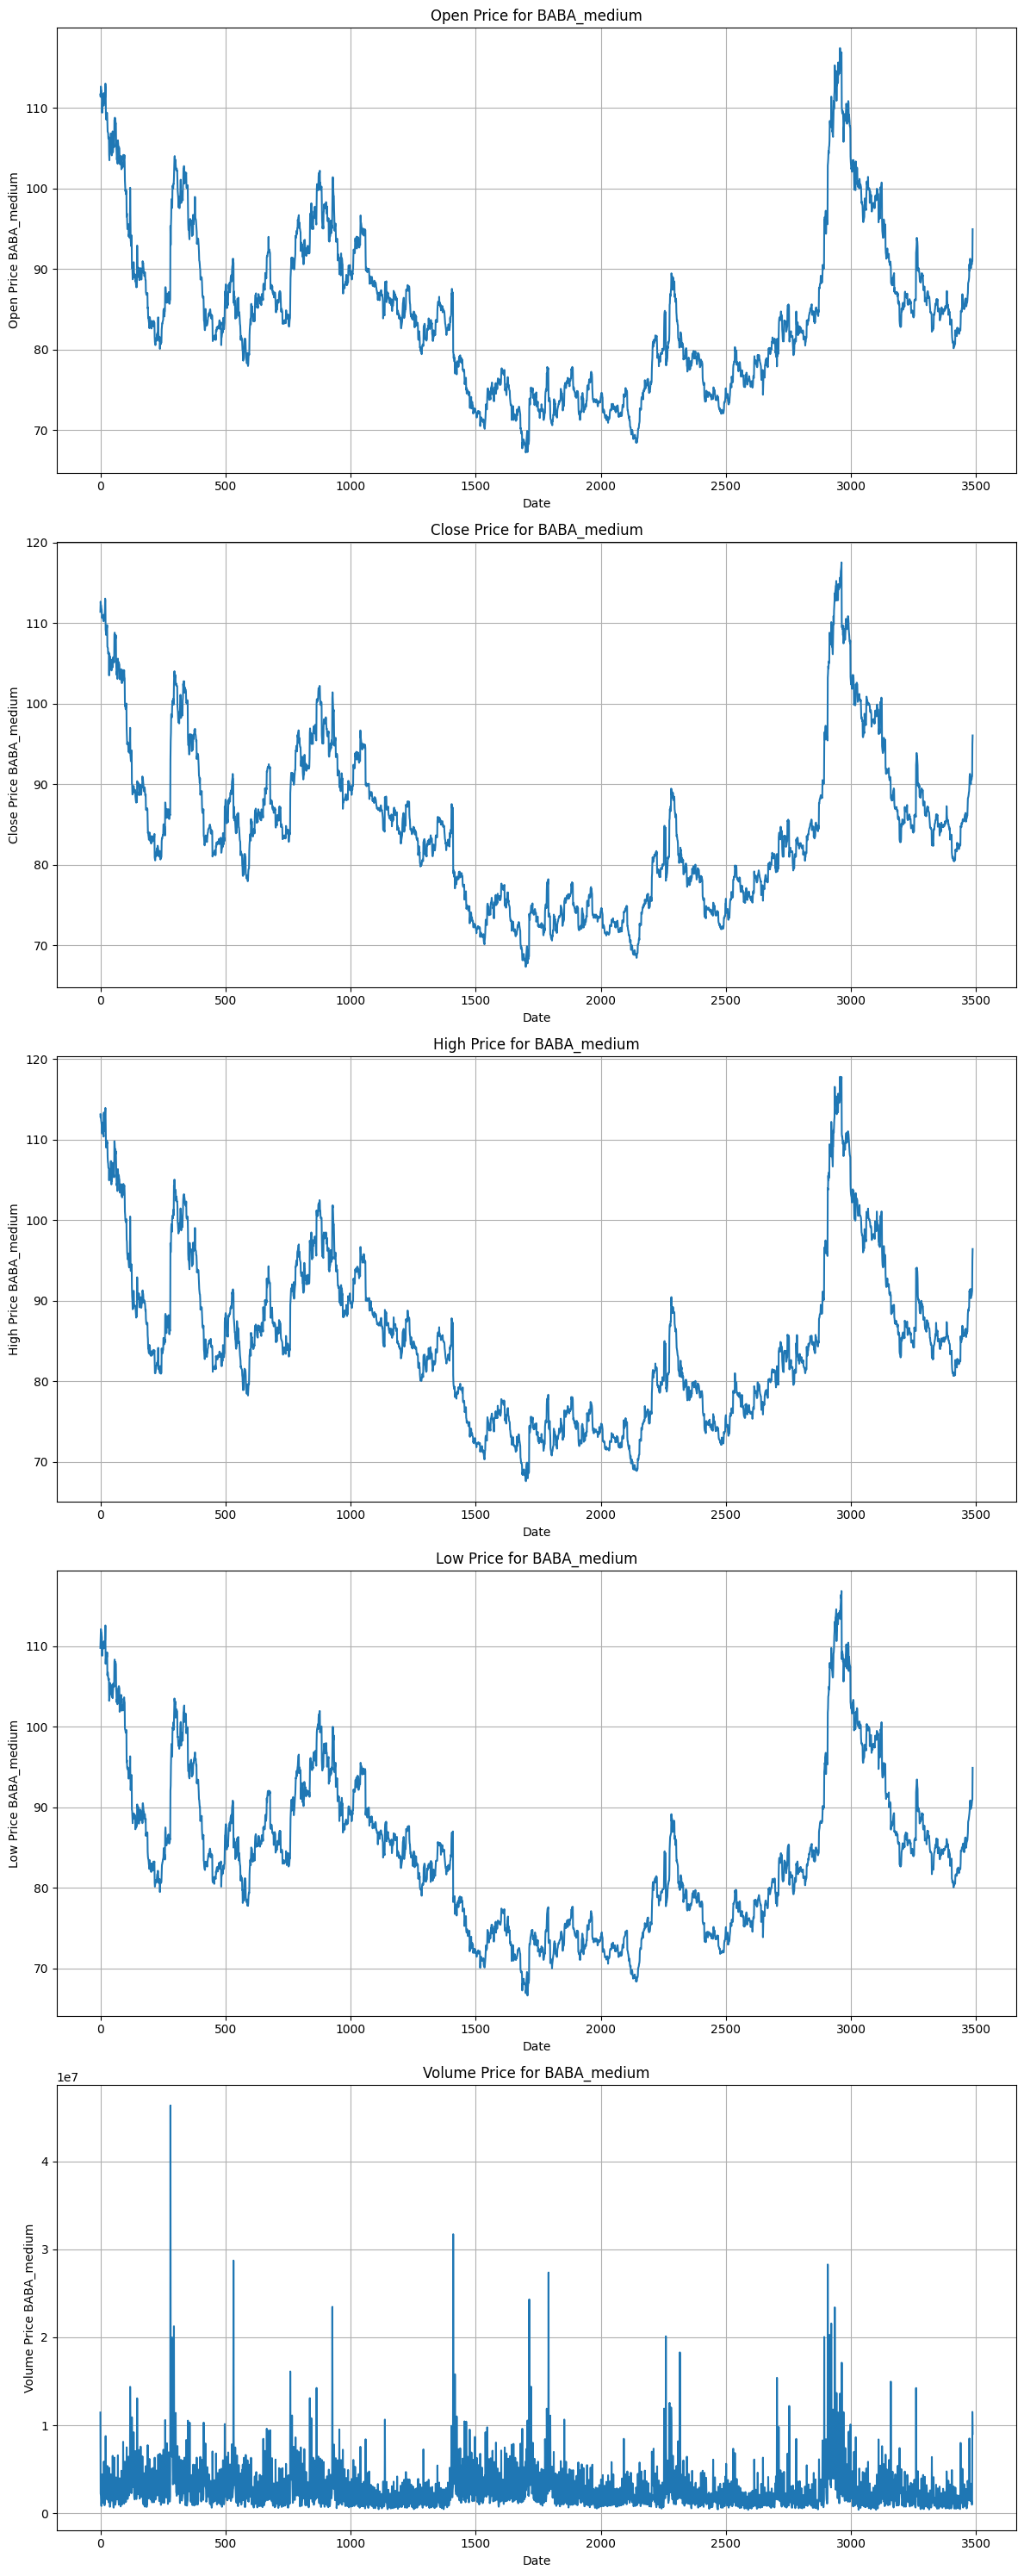

In [11]:
# List of columns to plot
columns = ['Open', 'Close', 'High', 'Low', 'Volume']

# Create subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 6 * len(columns)))

# Loop through each column and plot
for i, col in enumerate(columns):
    axes[i].plot(baba_medium_data.index, baba_medium_data[col])
    axes[i].set_title(f'{col} Price for BABA_medium')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{col} Price BABA_medium')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

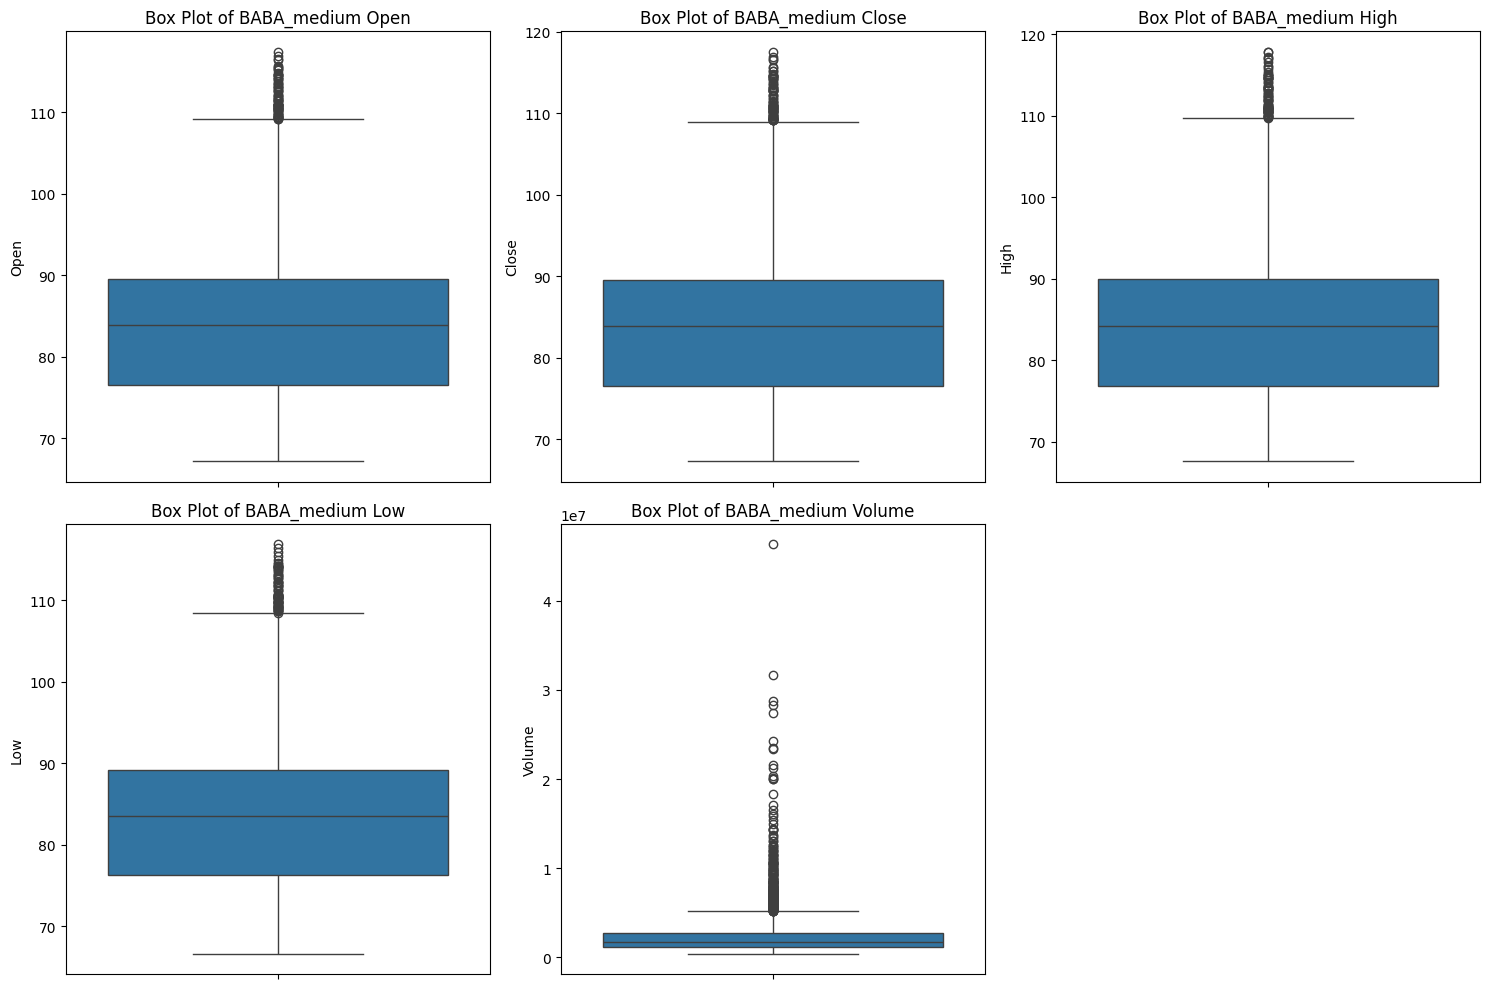

In [12]:
columns = ['Open', 'Close', 'High', 'Low', 'Volume']  # Columns to check

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)  # Create subplots for each column
    sns.boxplot(y=baba_medium_data[col])
    plt.title(f'Box Plot of BABA_medium {col}')

plt.tight_layout()
plt.show()

## Bivariate Analysis

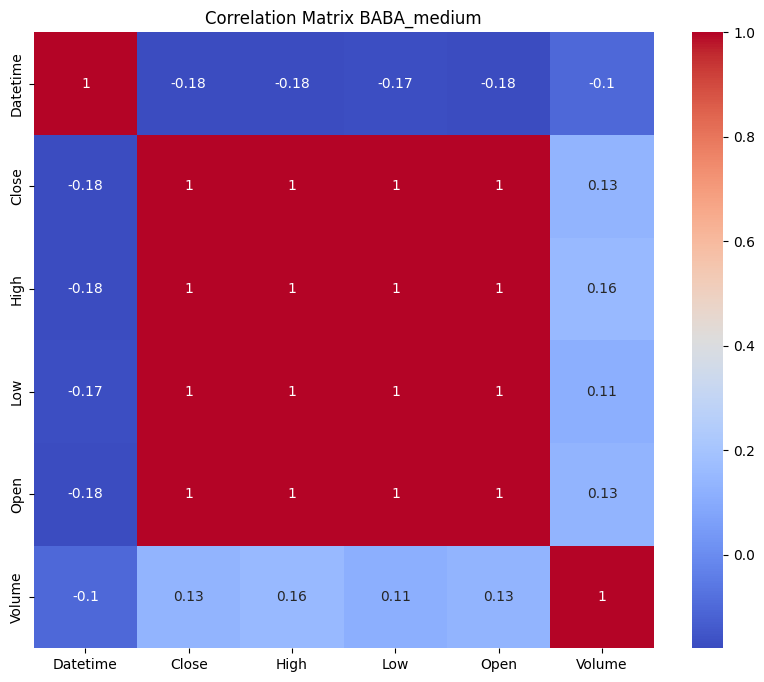

In [13]:
correlation_matrix = baba_medium_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix BABA_medium')
plt.show()

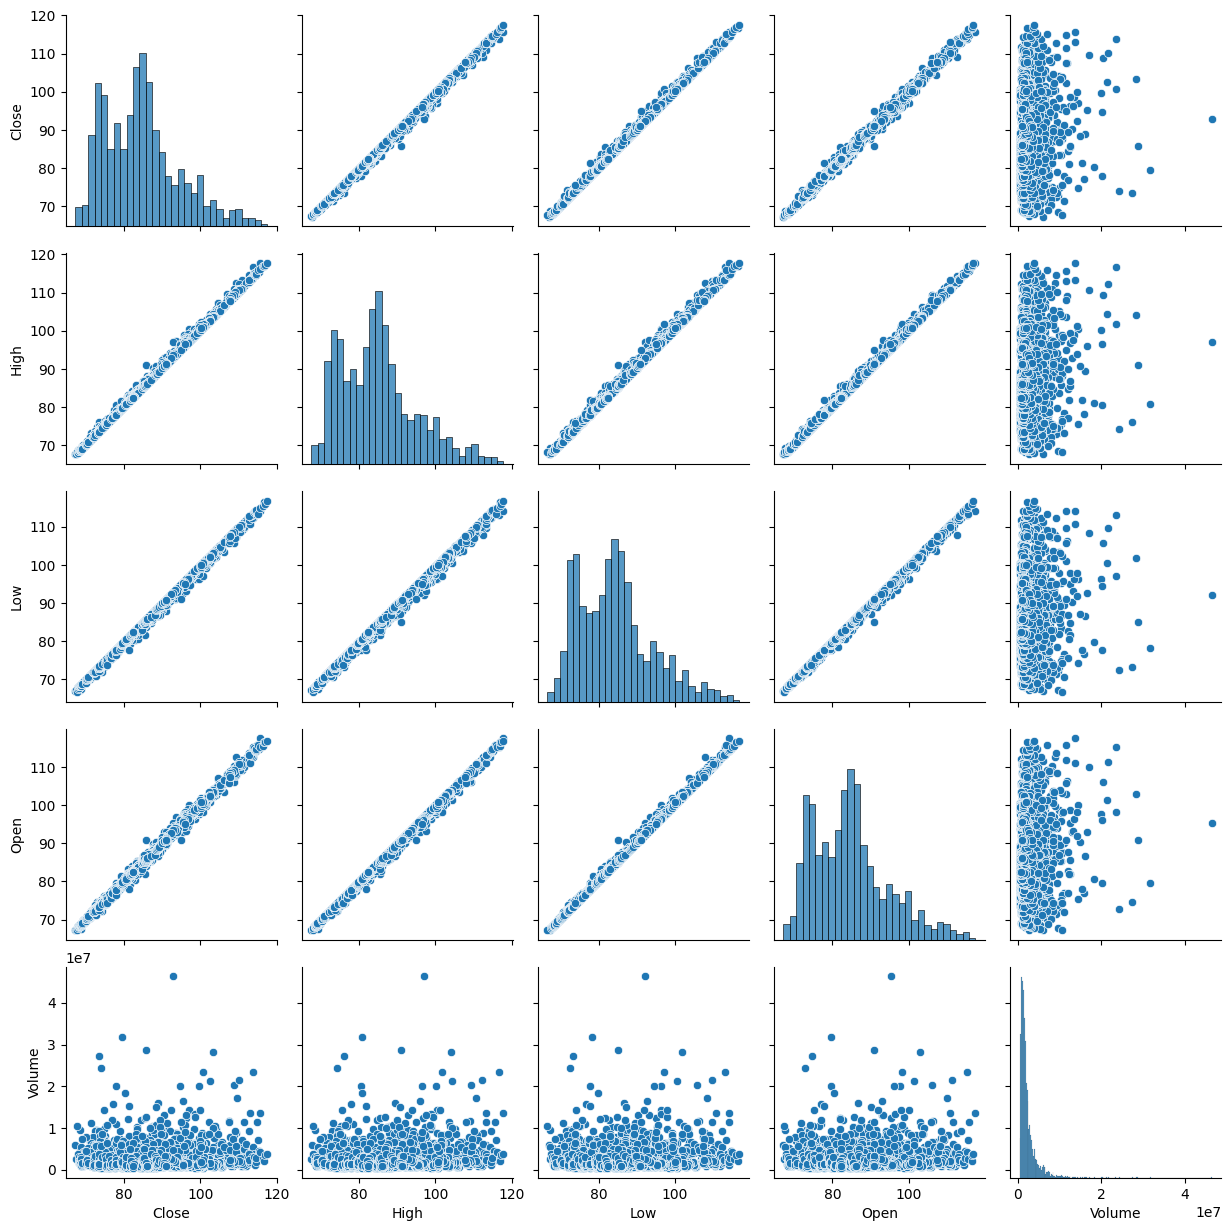

In [14]:
# pairs of numerical columns
sns.pairplot(baba_medium_data.select_dtypes(include=np.number))
plt.show()

Text(0.5, 1.0, 'BABA_medium Relationship between Close Price and Trading Volume')

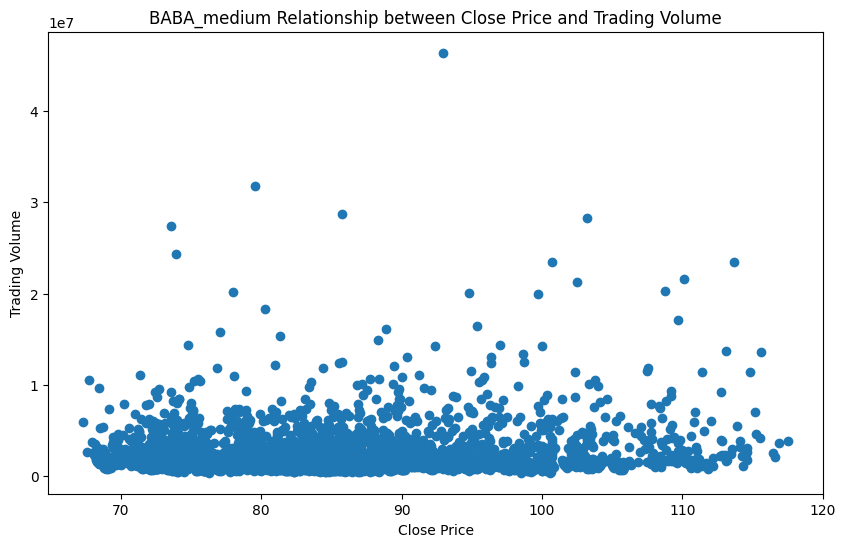

In [15]:
# relationship between price and trading volume
plt.figure(figsize=(10, 6))
plt.scatter(baba_medium_data['Close'], baba_medium_data['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Trading Volume')
plt.title('BABA_medium Relationship between Close Price and Trading Volume')

# Feature Engineering

In [16]:
# Moving Average (SMA) with a 365-day window
window_sma = 365
baba_medium_data['SMA'] = baba_medium_data['Close'].rolling(window=window_sma).mean()

# Bollinger Bands with a 365-day window
baba_medium_data['StdDev'] = baba_medium_data['Close'].rolling(window=window_sma).std()
baba_medium_data['UpperBand'] = baba_medium_data['SMA'] + (2 * baba_medium_data['StdDev'])
baba_medium_data['LowerBand'] = baba_medium_data['SMA'] - (2 * baba_medium_data['StdDev'])

# RSI with a 60-day window
def calculate_rsi(data, window=60):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

baba_medium_data['RSI'] = calculate_rsi(baba_medium_data)

In [17]:
baba_medium_data

,Datetime,Close,High,Low,Open,Volume,SMA,StdDev,UpperBand,LowerBand,RSI
0,2023-01-30 14:30:00+00:00,111.391701,113.139900,109.779999,111.690002,11459198,NaN,NaN,NaN,NaN,NaN
1,2023-01-30 15:30:00+00:00,112.669998,112.750000,111.180000,111.389999,2259790,NaN,NaN,NaN,NaN,NaN
2,2023-01-30 16:30:00+00:00,112.209999,113.150002,112.120003,112.675003,1997179,NaN,NaN,NaN,NaN,NaN
3,2023-01-30 17:30:00+00:00,112.190002,112.379997,111.800003,112.197197,1161796,NaN,NaN,NaN,NaN,NaN
4,2023-01-30 18:30:00+00:00,111.830002,112.198997,111.724998,112.180000,829704,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3482,2025-01-28 16:30:00+00:00,90.589996,90.669998,90.220001,90.550003,1196882,86.678621,3.628598,93.935817,79.421424,74.868780
3483,2025-01-28 17:30:00+00:00,90.910004,90.949997,90.550003,90.589996,981440,86.654237,3.569538,93.793312,79.515162,75.268263
3484,2025-01-28 18:30:00+00:00,90.964996,91.220001,90.889999,90.900002,1013610,86.629045,3.505838,93.640721,79.617369,73.856788
3485,2025-01-28 19:30:00+00:00,94.943001,94.989998,90.965698,90.970001,11527996,86.614300,3.459082,93.532464,79.696136,79.786909


In [18]:
baba_medium_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,364
StdDev,364
UpperBand,364
LowerBand,364


In [19]:
# FILL NA with mean
baba_medium_data.fillna(baba_medium_data.mean(), inplace=True)

In [20]:
baba_medium_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


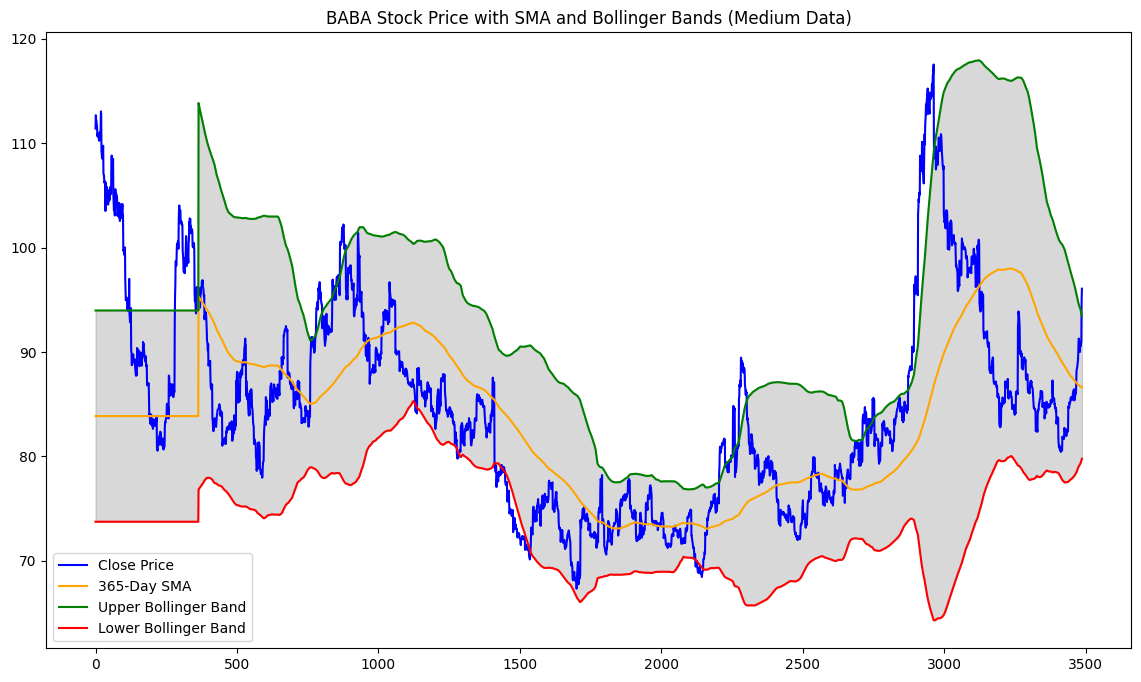

In [21]:
# Plot Close Price, SMA, and Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(baba_medium_data['Close'], label='Close Price', color='blue')
plt.plot(baba_medium_data['SMA'], label=f'{window_sma}-Day SMA', color='orange')
plt.plot(baba_medium_data['UpperBand'], label='Upper Bollinger Band', color='green')
plt.plot(baba_medium_data['LowerBand'], label='Lower Bollinger Band', color='red')
plt.fill_between(baba_medium_data.index, baba_medium_data['UpperBand'], baba_medium_data['LowerBand'], color='gray', alpha=0.3)
plt.title('BABA Stock Price with SMA and Bollinger Bands (Medium Data)')
plt.legend()
plt.show()

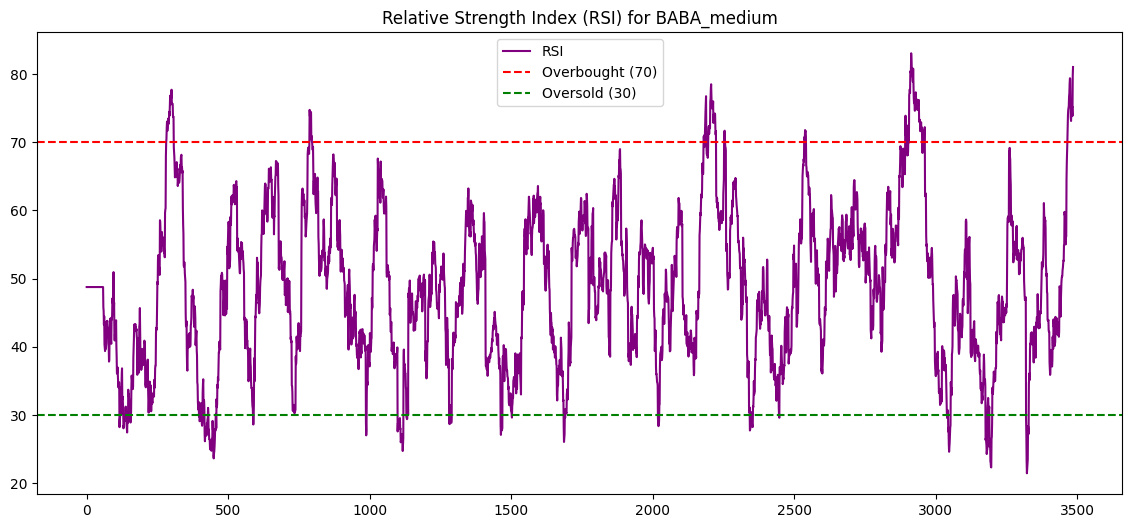

In [22]:
# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(baba_medium_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) for BABA_medium')
plt.legend()
plt.show()

In [23]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.7 MB/s eta 0:00:00


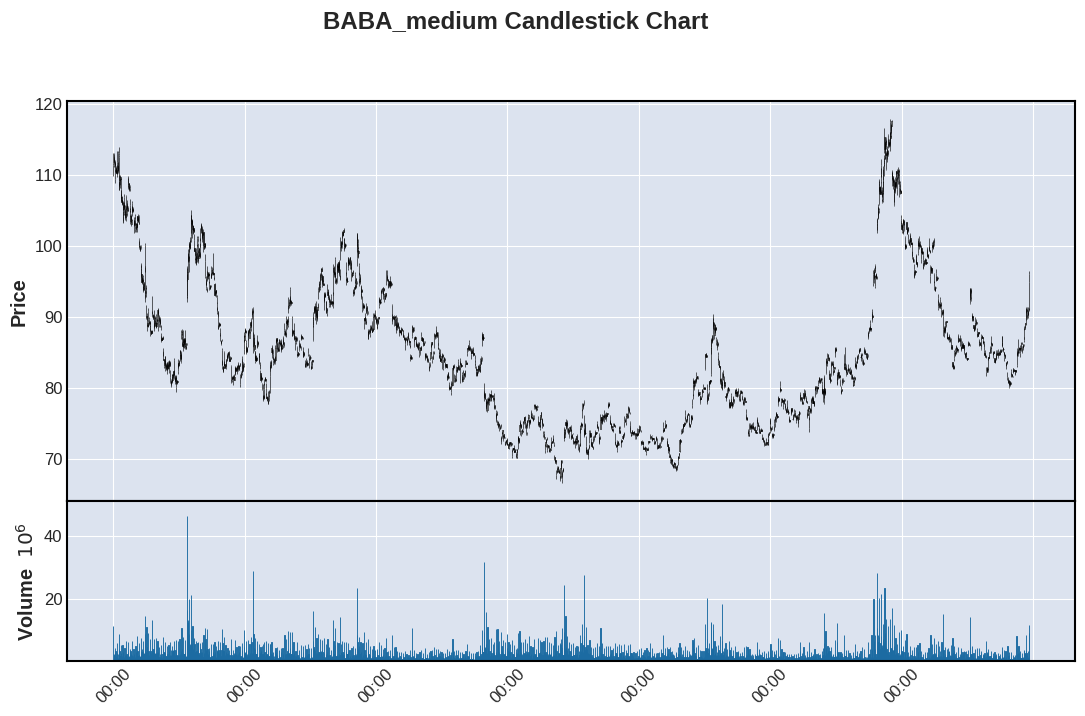

In [24]:
import mplfinance as mpf

# Ensure the index is a datetime object
baba_medium_data.index = pd.to_datetime(baba_medium_data.index)

# Plot candlestick chart
mpf.plot(baba_medium_data, type='candle', volume=True, figsize=(14, 8),
         title='BABA_medium Candlestick Chart')

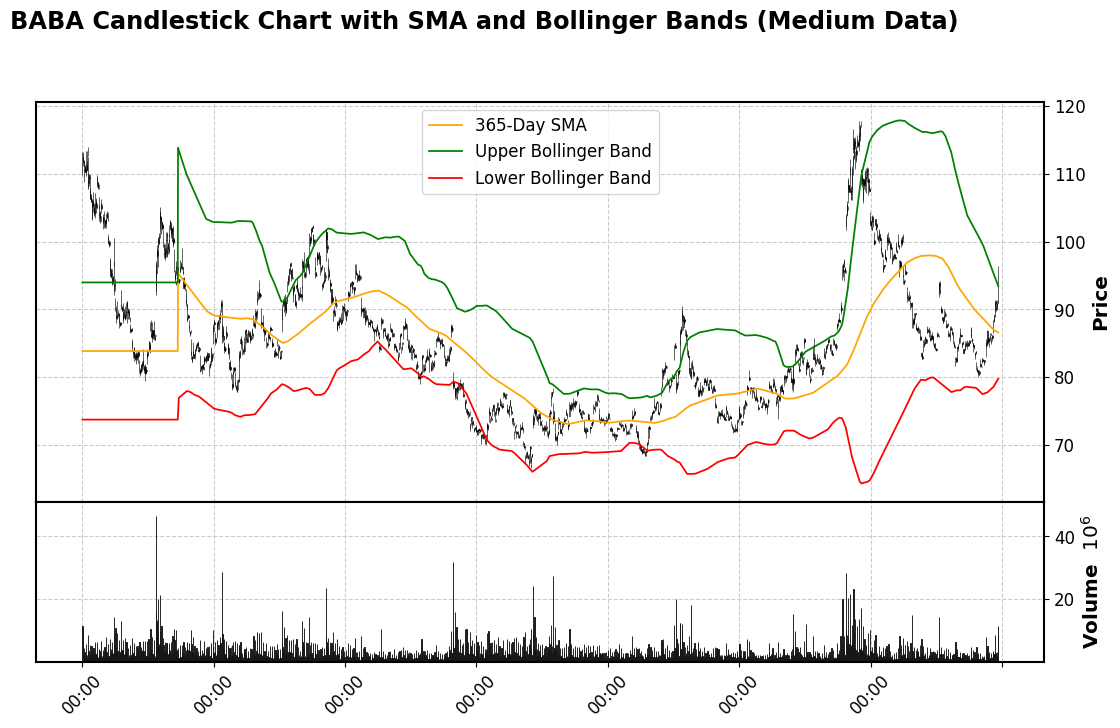

In [25]:
ap = [
    mpf.make_addplot(baba_medium_data['SMA'], color='orange', label=f'{window_sma}-Day SMA'),
    mpf.make_addplot(baba_medium_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(baba_medium_data['LowerBand'], color='red', label='Lower Bollinger Band')
]

# Plot candlestick chart with SMA and Bollinger Bands
mpf.plot(
    baba_medium_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 8),
    title='BABA Candlestick Chart with SMA and Bollinger Bands (Medium Data)',
    style='classic'  # You can change the style (e.g., 'classic', 'yahoo', 'charles')
)

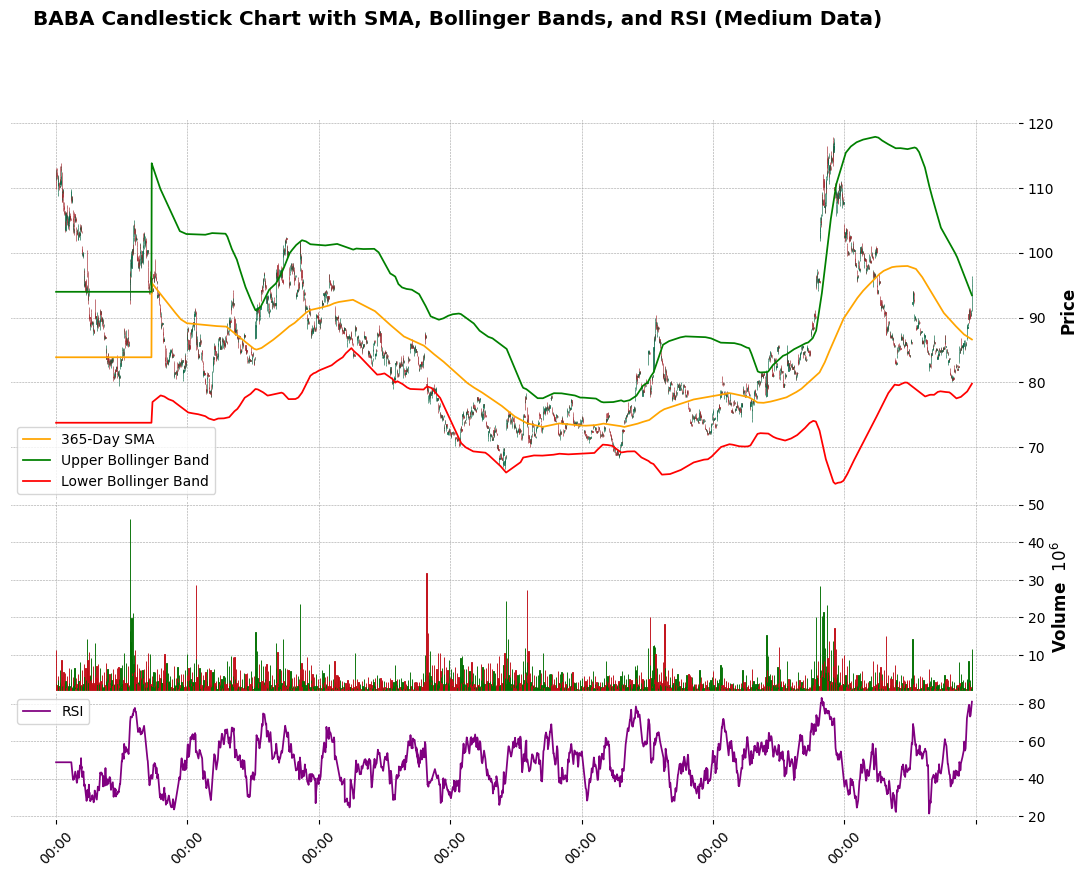

In [26]:
ap = [
    mpf.make_addplot(baba_medium_data['SMA'], color='orange', label=f'{window_sma}-Day SMA'),
    mpf.make_addplot(baba_medium_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(baba_medium_data['LowerBand'], color='red', label='Lower Bollinger Band'),
    mpf.make_addplot(baba_medium_data['RSI'], panel=2, color='purple', label='RSI')  # RSI in a separate panel
]

# Plot candlestick chart with SMA, Bollinger Bands, and RSI
mpf.plot(
    baba_medium_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 10),
    title='BABA Candlestick Chart with SMA, Bollinger Bands, and RSI (Medium Data)',
    style='charles',
    panel_ratios=(6, 3, 2)  # Adjust panel ratios for main chart, RSI, and volume
)

## Time Series Decomposition

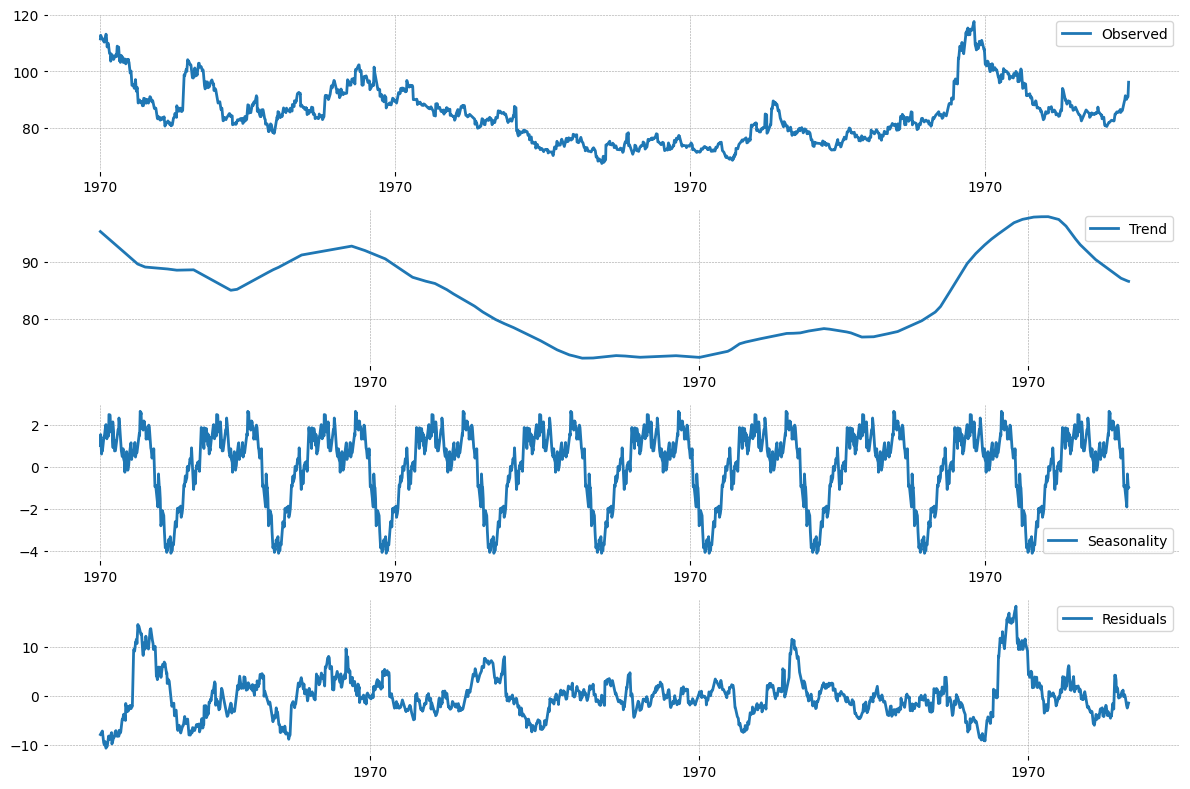

In [27]:
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(baba_medium_data['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Daily Returns & Volatility

Historical Volatility (Standard Deviation of Daily Returns): 0.88%


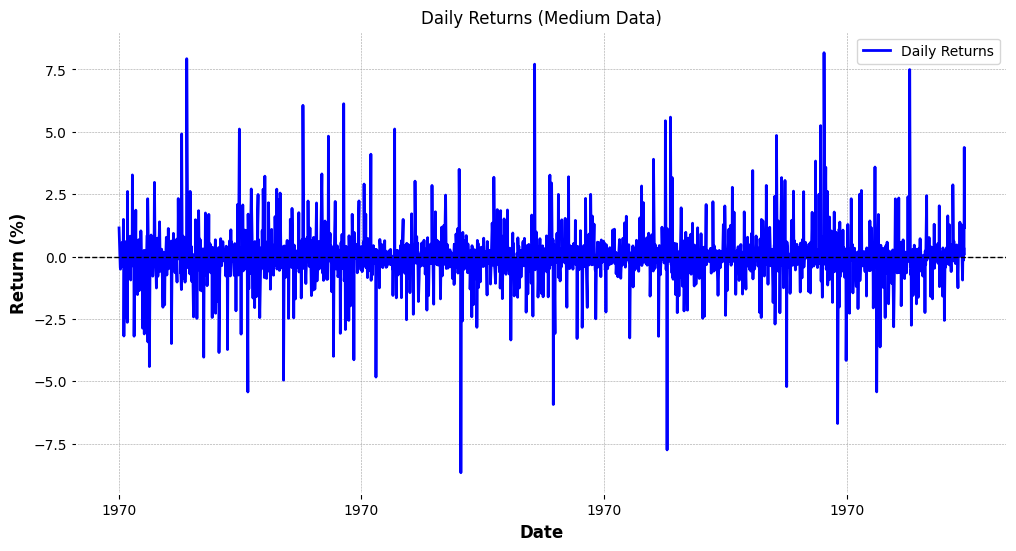

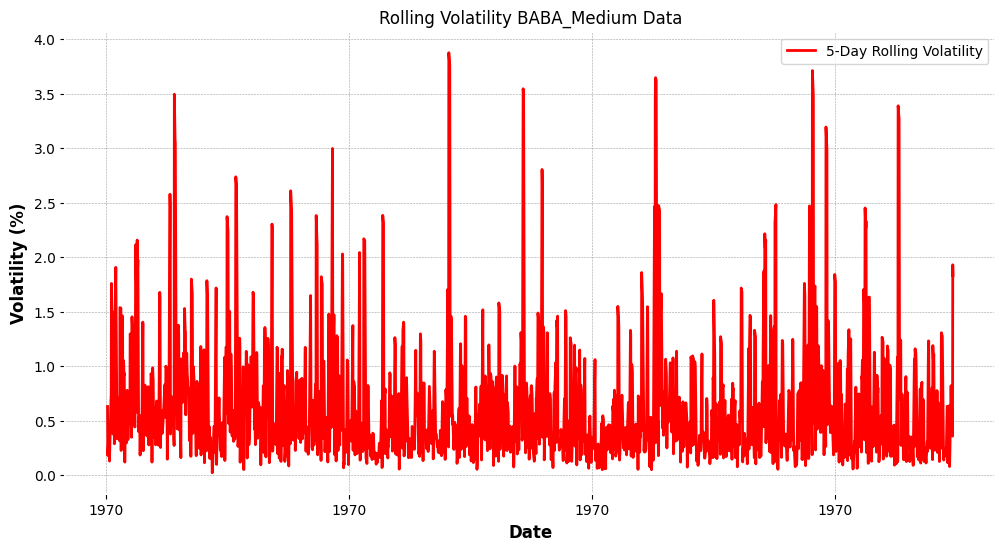

In [28]:
# Calculate daily returns
baba_medium_data['Daily_Return'] = baba_medium_data['Close'].pct_change() * 100  # Percentage change

# Calculate historical volatility (standard deviation of daily returns)
historical_volatility = baba_medium_data['Daily_Return'].std()

# Print historical volatility
print(f"Historical Volatility (Standard Deviation of Daily Returns): {historical_volatility:.2f}%")

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(baba_medium_data['Daily_Return'], label='Daily Returns', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Daily Returns (Medium Data)')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

# Calculate rolling volatility (e.g., 5-day rolling standard deviation)
rolling_window = 5  # Adjust the window size as needed
baba_medium_data['Rolling_Volatility'] = baba_medium_data['Daily_Return'].rolling(window=rolling_window).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(baba_medium_data['Rolling_Volatility'], label=f'{rolling_window}-Day Rolling Volatility', color='red')
plt.title('Rolling Volatility BABA_Medium Data')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()

# Stationarity Test

In [29]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(baba_medium_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpret the result
if result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -2.981524344671032
p-value: 0.03665618929278842
Critical Values:
   1%: -3.432227258117486
   5%: -2.8623694658254317
   10%: -2.567211539241138
The data is stationary (reject the null hypothesis).


<Figure size 1000x500 with 0 Axes>

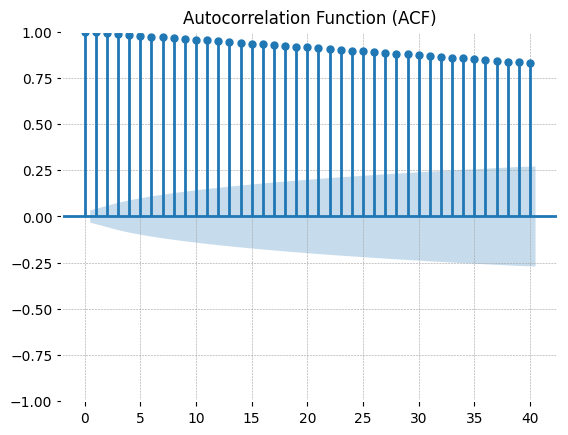

In [30]:
plt.figure(figsize=(10, 5))
plot_acf(baba_medium_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# LSTM Model

In [ ]:
# get the Date out of the index
baba_medium_data.reset_index(inplace=True)

In [ ]:
# isolet the Date and Sales columns
baba_medium_data = baba_medium_data[['Datetime', 'Close']]

In [ ]:
baba_medium_data

,Datetime,Close
0,2023-01-30 14:30:00+00:00,111.391701
1,2023-01-30 15:30:00+00:00,112.669998
2,2023-01-30 16:30:00+00:00,112.209999
3,2023-01-30 17:30:00+00:00,112.190002
4,2023-01-30 18:30:00+00:00,111.830002
...,...,...
3482,2025-01-28 16:30:00+00:00,90.589996
3483,2025-01-28 17:30:00+00:00,90.910004
3484,2025-01-28 18:30:00+00:00,90.964996
3485,2025-01-28 19:30:00+00:00,94.943001


In [ ]:
baba_medium_data

,Datetime,Close
0,2023-01-30 14:30:00+00:00,111.391701
1,2023-01-30 15:30:00+00:00,112.669998
2,2023-01-30 16:30:00+00:00,112.209999
3,2023-01-30 17:30:00+00:00,112.190002
4,2023-01-30 18:30:00+00:00,111.830002
...,...,...
3482,2025-01-28 16:30:00+00:00,90.589996
3483,2025-01-28 17:30:00+00:00,90.910004
3484,2025-01-28 18:30:00+00:00,90.964996
3485,2025-01-28 19:30:00+00:00,94.943001


In [ ]:
# Split into training and testing sets based on index
train_size = int(len(baba_medium_data) * 0.8)  # 80% for training
train_data = baba_medium_data[:train_size]
test_data = baba_medium_data[train_size:]

In [ ]:
# set the date coumn as index
train_data.set_index('Datetime', inplace=True)
test_data.set_index('Datetime', inplace=True)

In [ ]:
train_data

,Close
Datetime,
2023-01-30 14:30:00+00:00,111.391701
2023-01-30 15:30:00+00:00,112.669998
2023-01-30 16:30:00+00:00,112.209999
2023-01-30 17:30:00+00:00,112.190002
2023-01-30 18:30:00+00:00,111.830002
...,...
2024-08-30 16:30:00+00:00,83.235001
2024-08-30 17:30:00+00:00,83.334999
2024-08-30 18:30:00+00:00,83.385002


In [ ]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('2023-01-30 14:30:00+0000', tz='UTC'),
 Timestamp('2024-09-03 13:30:00+0000', tz='UTC'))

In [ ]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2024-09-03 14:30:00+0000', tz='UTC'),
 Timestamp('2025-01-28 20:30:00+0000', tz='UTC'))

In [ ]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close']])

In [ ]:
# Create sequences for the LSTM model
sequence_length = 100
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [ ]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [ ]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - loss: 0.0311
Epoch 2/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0011
Epoch 3/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 9.9196e-04
Epoch 4/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 7.6644e-04
Epoch 5/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 7.3177e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
32.59017086029053


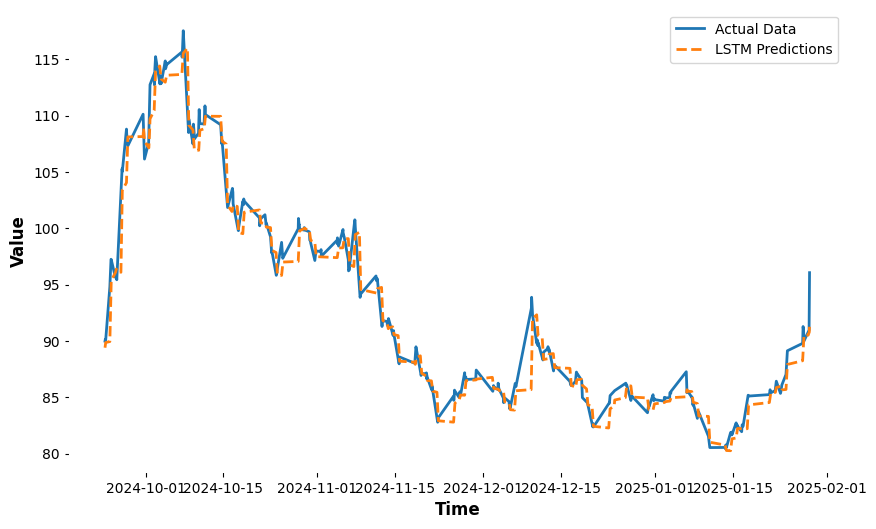

In [ ]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

1.0927299388443663


In [ ]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

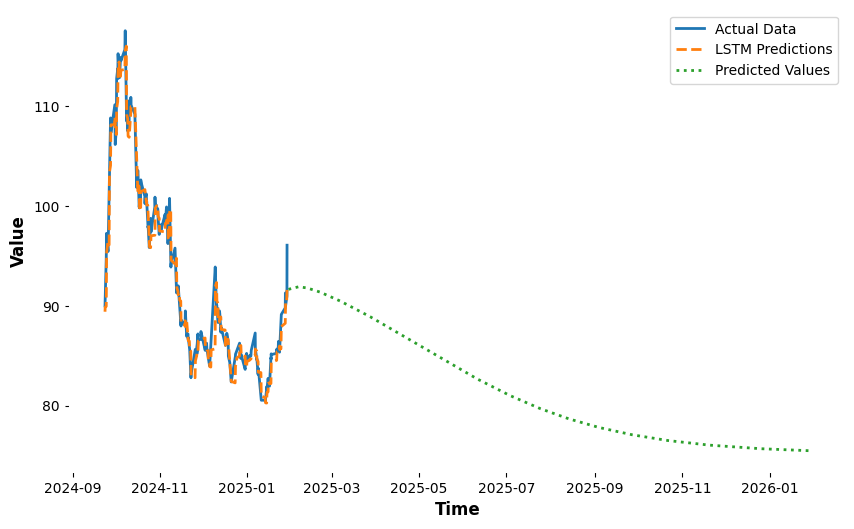

In [ ]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()